# Plot distributions of observables

Johann Brehmer, Kyle Cranmer, Marco Farina, Felix Kling, Duccio Pappadopulo, Josh Ruderman 2018

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
import logging
import os

from madminer.plotting import plot_distributions
from madminer.sampling import combine_and_shuffle


In [2]:
logging.basicConfig(
    format='%(asctime)-5.5s %(name)-20.20s %(levelname)-7.7s %(message)s',
    datefmt='%H:%M',
    level=logging.INFO
)

for key in logging.Logger.manager.loggerDict:
    if "madminer" not in key:
        logging.getLogger(key).setLevel(logging.WARNING)

In [3]:
base_dir = '/Users/johannbrehmer/work/projects/madminer/diboson_mining/'
mg_dir = '/Users/johannbrehmer/work/projects/madminer/MG5_aMC_v2_6_4/'

In [4]:
sample_dir = base_dir + 'data/samples/wgamma_sys/'
card_dir = base_dir + 'cards/wgamma/'
ufo_model_dir = card_dir + 'SMWgamma_UFO'
run_card_dir = card_dir + 'run_cards/'
mg_process_dir = base_dir + 'data/mg_processes/wgamma_sys/'
log_dir = base_dir + 'logs/wgamma_sys/'
temp_dir = base_dir + 'data/temp'
delphes_dir = mg_dir + 'Delphes'

## Plot nuisance replicas

13:46 madminer.sampling    INFO    Loading data from /Users/johannbrehmer/work/projects/madminer/diboson_mining/data/samples/wgamma_sys/samples_tight.h5
13:46 madminer.sampling    INFO    Found 2 parameters
13:46 madminer.sampling    INFO    Found 55 nuisance parameters
13:46 madminer.sampling    INFO    Found 103 benchmarks, of which 6 physical
13:46 madminer.sampling    INFO    Found 33 observables
13:46 madminer.sampling    INFO    Found 1136213 events
13:46 madminer.sampling    INFO    Found morphing setup with 6 components
13:46 madminer.sampling    INFO    Found nuisance morphing setup


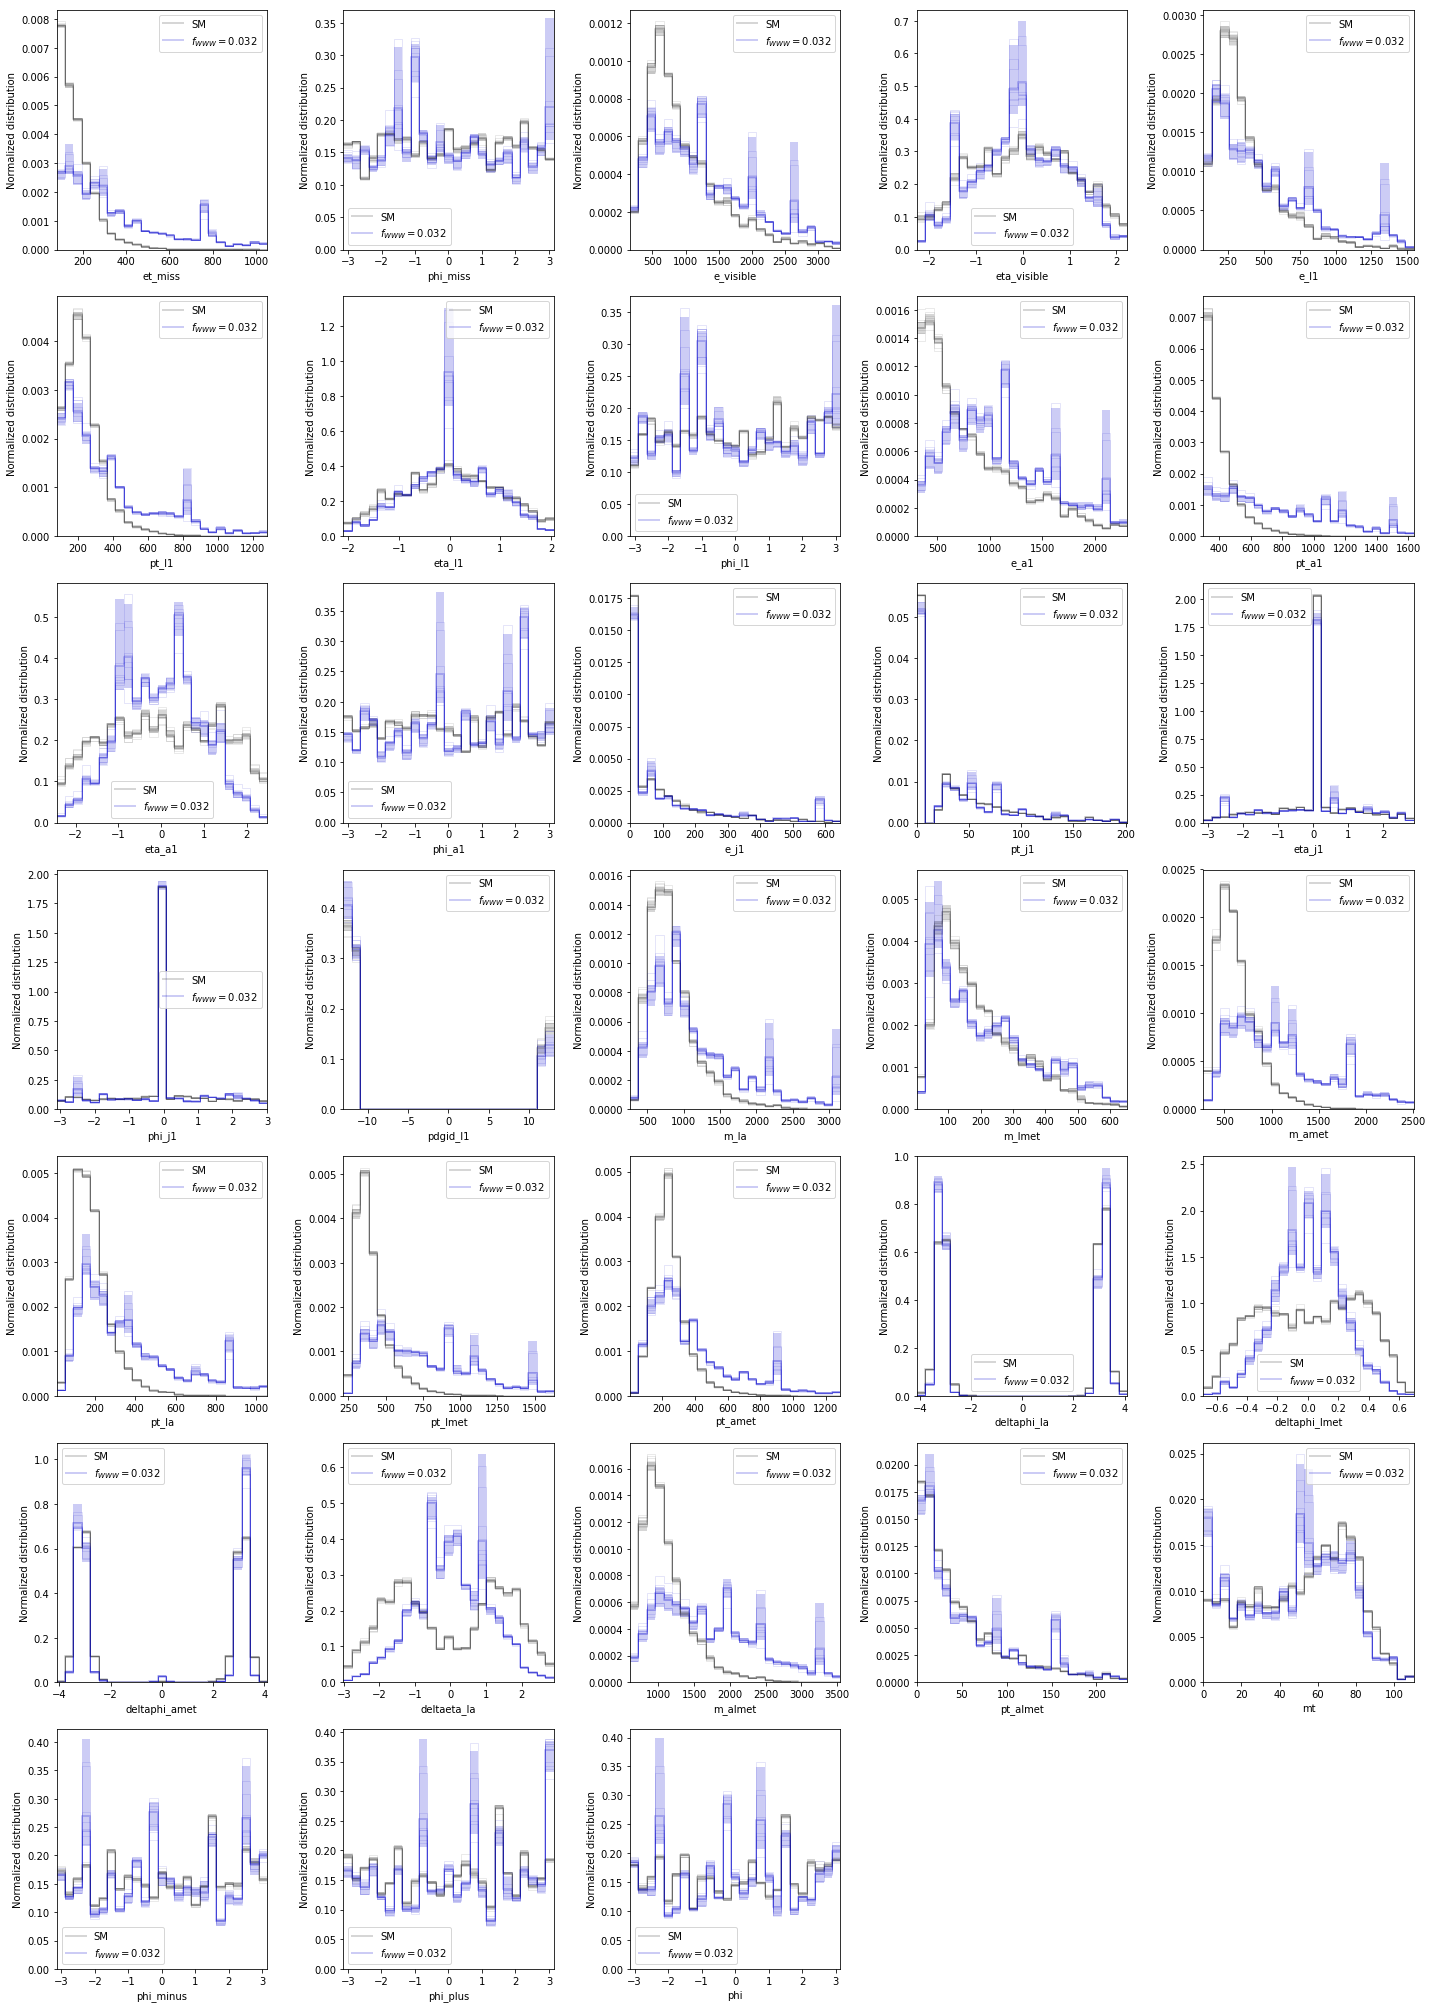

In [6]:
fig = plot_distributions(
    filename=sample_dir + 'samples_tight.h5',
    parameter_points=[np.array([0.,0.]),
                      np.array([0.032,0.])],
    draw_nuisance_toys=10,
    normalize=True,
    line_labels=['SM', r'$f_{WWW} = 0.032$'],
    colors=['0.2', 'mediumblue'],
    alpha=0.2,
    toy_alpha=1.,
    linewidths=2.,
    toy_linewidths=0.5,
    linestyles=['-','-'],
    n_events=10000,
    n_bins=25,
    n_cols=5
)

plt.savefig('../../figures/wgamma/observables_replicas.pdf')

## Plot all

In [ ]:
fig = plot_distributions(
    filename=sample_dir + 'samples_tight.h5',
    parameter_points=[np.array([0.,0.]),
                      np.array([0.032,0.])],
    normalize=True,
    line_labels=['SM', r'$f_{WWW} = 0.032$'],
    colors=['0.2', 'mediumblue'],
    alpha=0.25,
    linestyles=['-','--'],
    n_events=None,
    n_bins=25,
    n_cols=5
)

plt.savefig('../../figures/wgamma/observables.pdf')

13:47 madminer.sampling    INFO    Loading data from /Users/johannbrehmer/work/projects/madminer/diboson_mining/data/samples/wgamma_sys/samples_tight.h5
13:47 madminer.sampling    INFO    Found 2 parameters
13:47 madminer.sampling    INFO    Found 55 nuisance parameters
13:47 madminer.sampling    INFO    Found 103 benchmarks, of which 6 physical
13:47 madminer.sampling    INFO    Found 33 observables
13:47 madminer.sampling    INFO    Found 1136213 events
13:47 madminer.sampling    INFO    Found morphing setup with 6 components
13:47 madminer.sampling    INFO    Found nuisance morphing setup
/Users/johannbrehmer/work/projects/madminer/madminer/madminer/morphing.py:695: RuntimeWarning: divide by zero encountered in log
  a.append(np.log(benchmark_weights[:, i_pos] / benchmark_weights[:, self.i_benchmark_ref]))


In [ ]:
fig = plot_distributions(
    filename=sample_dir + 'samples_tight.h5',
    parameter_points=[np.array([0.,0.]),
                      np.array([0.032,0.])],
    normalize=True,
    line_labels=['SM', r'$f_{WWW} = 0.032$'],
    colors=['0.2', 'mediumblue'],
    alpha=0.25,
    linestyles=['-','--'],
    n_events=None,
    n_bins=25,
    n_cols=5,
    nuisance_parameters=list(range(2,55))
)

plt.savefig('../../figures/wgamma/observables_pdf.pdf')

In [ ]:
fig = plot_distributions(
    filename=sample_dir + 'samples_tight.h5',
    parameter_points=[np.array([0.,0.]),
                      np.array([0.032,0.])],
    normalize=True,
    line_labels=['SM', r'$f_{WWW} = 0.032$'],
    colors=['0.2', 'mediumblue'],
    alpha=0.25,
    linestyles=['-','--'],
    n_events=None,
    n_bins=25,
    n_cols=5,
    nuisance_parameters=[0,1]
)

plt.savefig('../../figures/wgamma/observables_scales.pdf')